Big Data e Inteligência Artificial

Read and Explore Data

In [1]:
# Akmere
import pandas as pd
import seaborn as sb
import numpy as np # linear algebra

df = pd.read_csv('../data/bankruptcy_data.csv')

df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [2]:
df.shape

(6819, 96)

In [3]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Exploratory Data Analysis

In [6]:
#import required ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#let us check the Target variable
df['Bankrupt?'].value_counts()


0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Target feature - Bankrupt?')

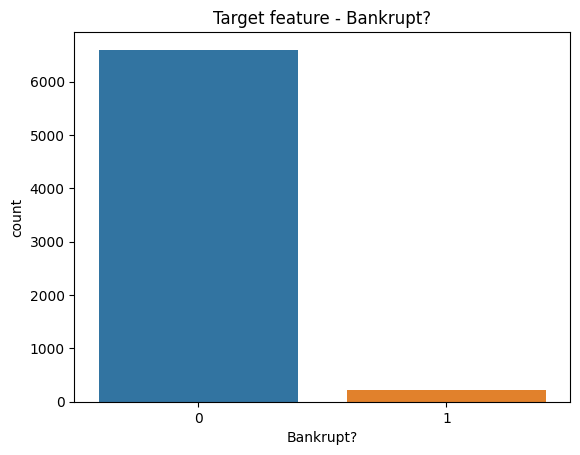

In [8]:
sns.countplot(x=df['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

In [9]:
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

In [10]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

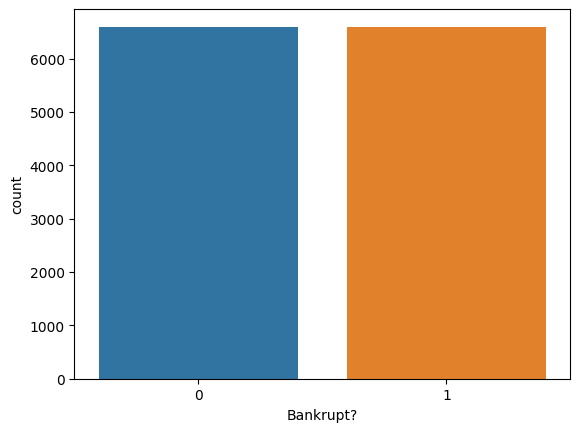

In [11]:
sns.countplot(x=y)

Feature Selection

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest

feature_selection=SelectKBest(f_classif,k=30).fit(X,y)

/usr/local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [14]:
selected_features=X.columns[feature_selection.get_support()]


Standardize the Independent Variable


In [15]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
log_reg.score(X_test,y_test)


0.8952020202020202

In [19]:
y_pred=log_reg.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Metrics

In [21]:
accuracy_score(y_test,y_pred)

0.8952020202020202

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1996
           1       0.88      0.91      0.90      1964

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



<AxesSubplot:>

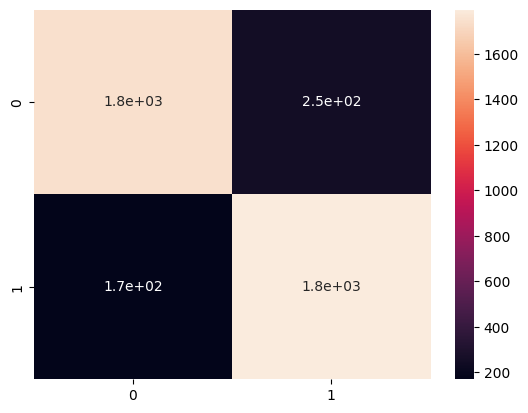

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)